In [37]:
import pandas as pd
import numpy as np

# Creating dataset

In [38]:
df={"Slno":[1,2,3,4,5,6],"Temperature":[0,20,40,60,80,100],"Pressure":[0.0002,0.0012,0.0060,0.0300,0.0900,0.2700]}
data=pd.DataFrame(df)
print(data)

   Slno  Temperature  Pressure
0     1            0    0.0002
1     2           20    0.0012
2     3           40    0.0060
3     4           60    0.0300
4     5           80    0.0900
5     6          100    0.2700


# Splitting the dataset

In [39]:
X=data.iloc[:,1:-1]
X

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [42]:
y=data.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

# Importing Linear Regression & Prediction

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [45]:
y_pred=lr.predict(X)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [46]:
y_pred.ndim

1

# Plotting the actual and predicted value
### Also finding the best fit line

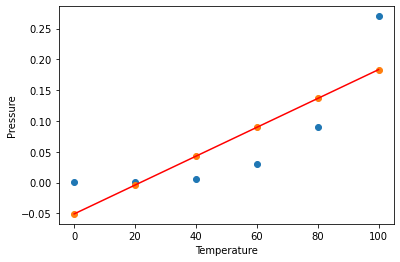

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.scatter(X,y_pred)
plt.plot(X,y_pred,color='Red')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()

# Finding the performance measure of the model

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2Score:",r2_score(y,y_pred))
print("Mean absolute score",mean_absolute_error(y,y_pred))
print("Mean square error",mean_squared_error(y,y_pred))

R2Score: 0.690349972603981
Mean absolute score 0.047653333333333346
Mean square error 0.002870267555555557


### Too bad performance

# Polynomial Regression

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
p_res=poly.fit_transform(X)
p_res

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0000e+01, 4.0000e+02, 8.0000e+03, 1.6000e+05,
        3.2000e+06],
       [1.0000e+00, 4.0000e+01, 1.6000e+03, 6.4000e+04, 2.5600e+06,
        1.0240e+08],
       [1.0000e+00, 6.0000e+01, 3.6000e+03, 2.1600e+05, 1.2960e+07,
        7.7760e+08],
       [1.0000e+00, 8.0000e+01, 6.4000e+03, 5.1200e+05, 4.0960e+07,
        3.2768e+09],
       [1.0000e+00, 1.0000e+02, 1.0000e+04, 1.0000e+06, 1.0000e+08,
        1.0000e+10]])

In [67]:
plr=LinearRegression()
plr.fit(p_res,y)

LinearRegression()

In [68]:
y_predict=plr.predict(p_res)
y_predict

array([2.00000485e-04, 1.20000009e-03, 5.99999995e-03, 3.00000000e-02,
       8.99999999e-02, 2.70000000e-01])

In [51]:
y_predict.ndim

1

# Plotting

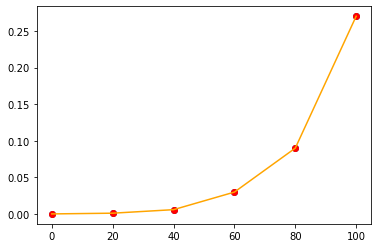

In [69]:
plt.scatter(X.ravel(),y)
plt.scatter(X,y_predict,c='Red')
plt.plot(X,y_predict,color="Orange")

In [70]:
print("R2Score:",r2_score(y,y_predict))
print("Mean absolute score",mean_absolute_error(y,y_predict))
print("Mean square error",mean_squared_error(y,y_predict))

R2Score: 1.0
Mean absolute score 2.071913656403546e-10
Mean square error 7.625338497462775e-20


### Better and more accurate model created

# prediction with new value

In [72]:
y_new=plr.predict(poly.transform([[50]]))
y_new.item()

0.015353906251651298

# From dataset

In [73]:
import os

In [74]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\DS_Projects'

In [75]:
data1=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\DS_Projects\\position_salaries.xls')
data1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [78]:
X1=data1.iloc[:,1:-1]
X1

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [80]:
y1=data1.iloc[:,-1]
y1

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()
lir.fit(X1,y1)

LinearRegression()

In [82]:
y_pred1=lir.predict(X1)
y_pred1

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

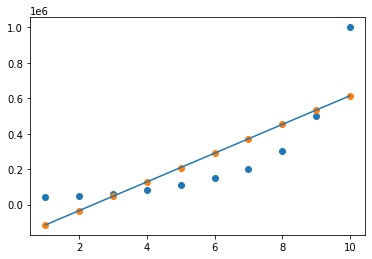

In [83]:
plt.scatter(X1,y1)
plt.scatter(X1,y_pred1)
plt.plot(X1,y_pred1)

In [86]:
print("R2Score:",r2_score(y1,y_pred1))
print("Mean squared error:",mean_squared_error(y1,y_pred1))
print("Mean Absolute error:",mean_absolute_error(y1,y_pred1))

R2Score: 0.6690412331929895
Mean squared error: 26695878787.878788
Mean Absolute error: 128454.54545454546


### low performance

# Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5)
train=pf.fit_transform(X1)
train

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [95]:
plr1=LinearRegression()
plr1.fit(train,y1)

LinearRegression()

In [96]:
y_predict1=plr1.predict(train)
y_predict1

array([ 43895.1048958 ,  53836.82983726,  57065.26806543,  77286.71328667,
       112263.40326323, 152736.59673637, 201349.65034941, 291571.09557086,
       506617.7156175 , 998377.62237747])

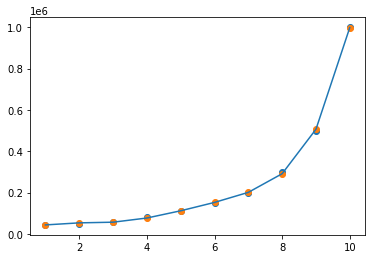

In [97]:
plt.scatter(X1,y)
plt.scatter(X1,y_predict1)
plt.plot(X1,y_predict1)

In [98]:
print("R2Score:",r2_score(y1,y_predict1))
print("Mean squared error:",mean_squared_error(y1,y_predict1))
print("Mean Absolute error:",mean_absolute_error(y1,y_predict1))

R2Score: 0.9997969027099755
Mean squared error: 16382284.382278968
Mean Absolute error: 3360.839160753996


## Better model with less loss created

# Predicting new value

In [100]:
y_new1=plr1.predict(pf.transform([[50]]))
y_new

array([0.01535391])